In [1]:
import pandas as pd

In [2]:
# Retrieve Data

In [3]:
Employee_Data = r"\Users\Liam\Desktop\Code Stuff\Decision Tree\Employee_Data.csv"
Employee_D = pd.read_csv(Employee_Data)

In [4]:
pd.set_option("display.max_columns", None)
Employee_D.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [5]:
#Shows unique values in selected columns

In [6]:
print(Employee_D['StandardHours'].unique())
print(Employee_D['EmployeeCount'].unique())
print(Employee_D['Over18'].unique())
print(Employee_D['EmployeeNumber'].nunique())

[80]
[1]
['Y']
1470


In [7]:
# Since StandardHours, EmployeeCount and Over18 only have one value each, they can safely be dropped. EmployeeNumber also appears to only be a unique identifier for each employee and can also be dropped

In [8]:
Employee_D.drop(['StandardHours', 'EmployeeCount', 'Over18', 'EmployeeNumber'], axis=1, inplace=True)

In [9]:
# Shows if any data from the set is missing

<AxesSubplot:>

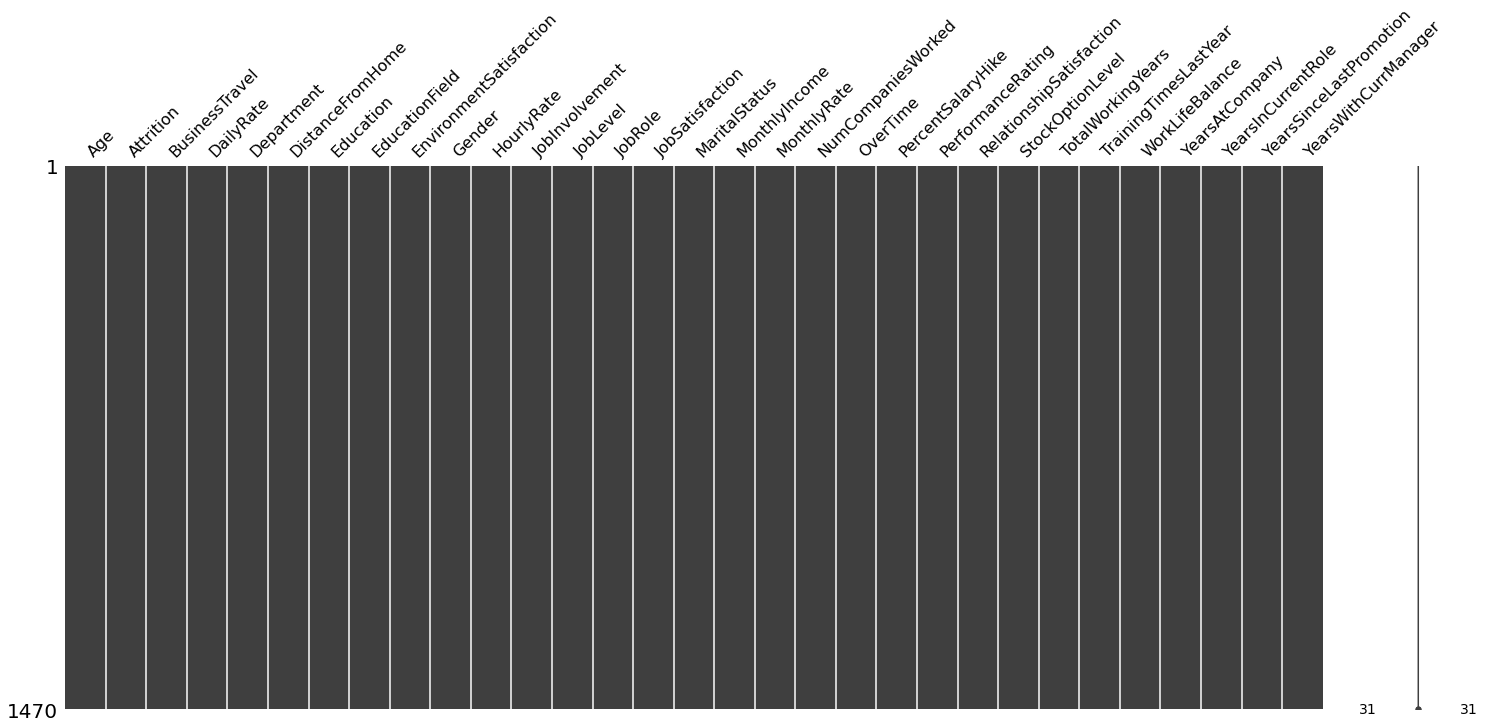

In [10]:
import missingno as msno
msno.matrix(Employee_D)

In [11]:
# Records are complete, no columns need to be dropped based on lack of or missing data

In [12]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler

In [13]:
# Remove all text data and replace with integers

In [14]:
# Change the Attrition column to integer. Yes = 1, No = 0
# Change the Gender column to integer. Male = 1, Female = 0
# Change the Department column to integer. Sales = 2, Research & Development = 1, Human Resources = 0
# Change the EducationField column to integer. Technical Degree = 5, Other = 4, Medical = 3, Marketing = 2, Life Sciences = 1, Human Resources = 0
# Change the BusinessTravel column to integer. Travel_Rarely = 2, Travel_Frequently = 1, Non-Travel = 0
# Change the JobRole column to integer. Sales Executive = 7, Research Scientist = 6, Research Director = 5, Manufacturing Director = 4, Manager = 3, Laboratory Technician = 2, Human Resources = 1, Healthcare Representative = 0
# Change the MaritalStatus column to integer. Single = 2, Married = 1, Divorced = 0
# Change the OverTime column to integer. Yes = 1, No = 0

In [15]:
Employee_D['Attrition'] = LabelEncoder().fit_transform(Employee_D['Attrition'])
Employee_D['Gender'] = LabelEncoder().fit_transform(Employee_D['Gender'])
Employee_D['Department'] = LabelEncoder().fit_transform(Employee_D['Department'])
Employee_D['EducationField'] = LabelEncoder().fit_transform(Employee_D['EducationField'])
Employee_D['BusinessTravel'] = LabelEncoder().fit_transform(Employee_D['BusinessTravel'])
Employee_D['JobRole'] = LabelEncoder().fit_transform(Employee_D['JobRole'])
Employee_D['MaritalStatus'] = LabelEncoder().fit_transform(Employee_D['MaritalStatus'])
Employee_D['OverTime'] = LabelEncoder().fit_transform(Employee_D['OverTime'])

In [16]:
# Display modified data set

In [17]:
Employee_D.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,2,0,94,3,2,7,4,2,5993,19479,8,1,11,3,1,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,3,1,61,2,2,6,2,1,5130,24907,1,0,23,4,4,1,10,3,3,10,7,1,7
2,37,1,2,1373,1,2,2,4,4,1,92,2,1,2,3,2,2090,2396,6,1,15,3,2,0,7,3,3,0,0,0,0
3,33,0,1,1392,1,3,4,1,4,0,56,3,1,6,3,1,2909,23159,1,1,11,3,3,0,8,3,3,8,7,3,0
4,27,0,2,591,1,2,1,3,1,1,40,3,1,2,2,1,3468,16632,9,0,12,3,4,1,6,3,3,2,2,2,2


In [18]:
input = Employee_D.drop('Attrition', axis='columns')
target = Employee_D['Attrition']

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
# Data is split into trainning and test data, with 80% being used for trainning and 20% for testing. Data is split randomly on seed 0, and stratified based on attrition

In [21]:
train_input, test_input, train_target, test_target = train_test_split(input,target, test_size=0.2,random_state=0, stratify=target)

In [22]:
from sklearn import tree

In [23]:
model = tree.DecisionTreeClassifier()

In [24]:
# Model is trained

In [25]:
model.fit(train_input,train_target)

DecisionTreeClassifier()

In [26]:
# Model is tested

In [27]:
model.score(test_input,test_target)

0.7755102040816326

In [28]:
# Roughly 77-80% accuracy on test data

In [29]:
corr_matrix = Employee_D.corr()

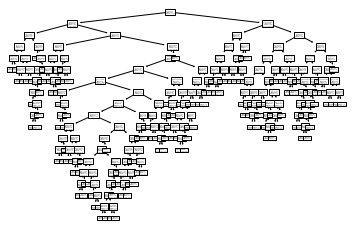

In [30]:
tree.plot_tree(model);

In [31]:
# Tree is quite large and may be overfitting, will trim tree using pre-pruning method of limiting depth

In [32]:
model2 = tree.DecisionTreeClassifier(max_depth=7)

In [33]:
model2.fit(train_input,train_target)

DecisionTreeClassifier(max_depth=7)

In [34]:
model2.score(test_input,test_target)

0.8367346938775511

In [35]:
# Initial pruning, limiting depth to 7, showed significant improvement to accuracy

In [36]:
model3 = tree.DecisionTreeClassifier(max_depth=5)

In [37]:
model3.fit(train_input,train_target)

DecisionTreeClassifier(max_depth=5)

In [38]:
model3.score(test_input,test_target)

0.8503401360544217

In [39]:
# Additional pruning, limiting depth to 5, shows modest improvement to accuracy

In [40]:
model4 = tree.DecisionTreeClassifier(max_depth=4)

In [41]:
model4.fit(train_input,train_target)

DecisionTreeClassifier(max_depth=4)

In [42]:
model4.score(test_input,test_target)

0.8231292517006803

In [43]:
# Further pruning, limiting depth to 4, shows a drop off in accuracy from earlier model (model3). Further pruning is unnecessary and detrimental

In [44]:
Final_Tree = model3

In [45]:
# Visual of final decision tree model with roughly 85% accuracy

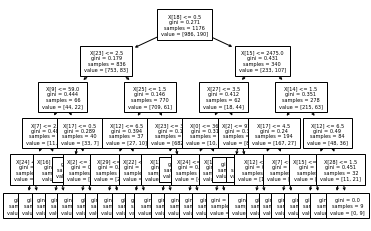

In [46]:
tree.plot_tree(Final_Tree, fontsize=5);